### # In this loan prediction dataset let us gain some insights based on the criterias that whether an applicant is eligible for the loan approval.
1. Load the dataset.

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Loan_Prediction_Dataset.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2. Understand the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.shape

(614, 13)

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(614, 13)

3. Handling missing values

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# used mode for categorical data to equalise the data
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# used median for numerical term to identify skewness
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

/tmp/ipython-input-141-823933083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-141-823933083.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

4. Convert categorical columns to numerical

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df = df.drop('Loan_ID', axis = 1)

5. **Exploratory data Analysis (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



To Analyse which gender has taken most of the loan.

<Axes: xlabel='Gender'>

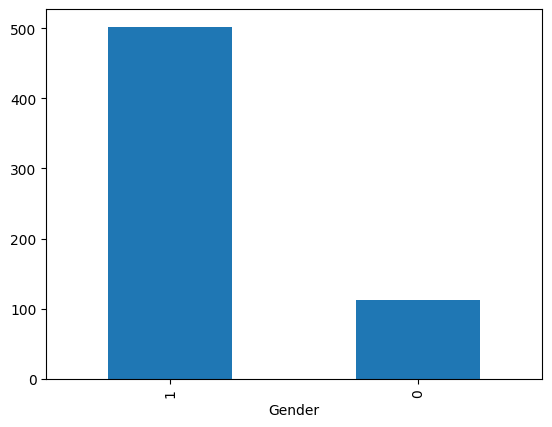

In [ ]:
df['LoanAmount'].hist(bins=20)
df['Gender'].value_counts().plot(kind='bar')

This shows how many loan approvals

<Axes: xlabel='Loan_Status'>

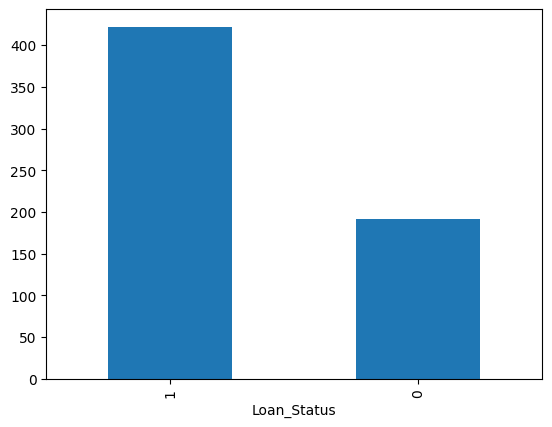

In [ ]:
df['Loan_Status'].value_counts().plot.bar()

** To Understand relationships with the target variable

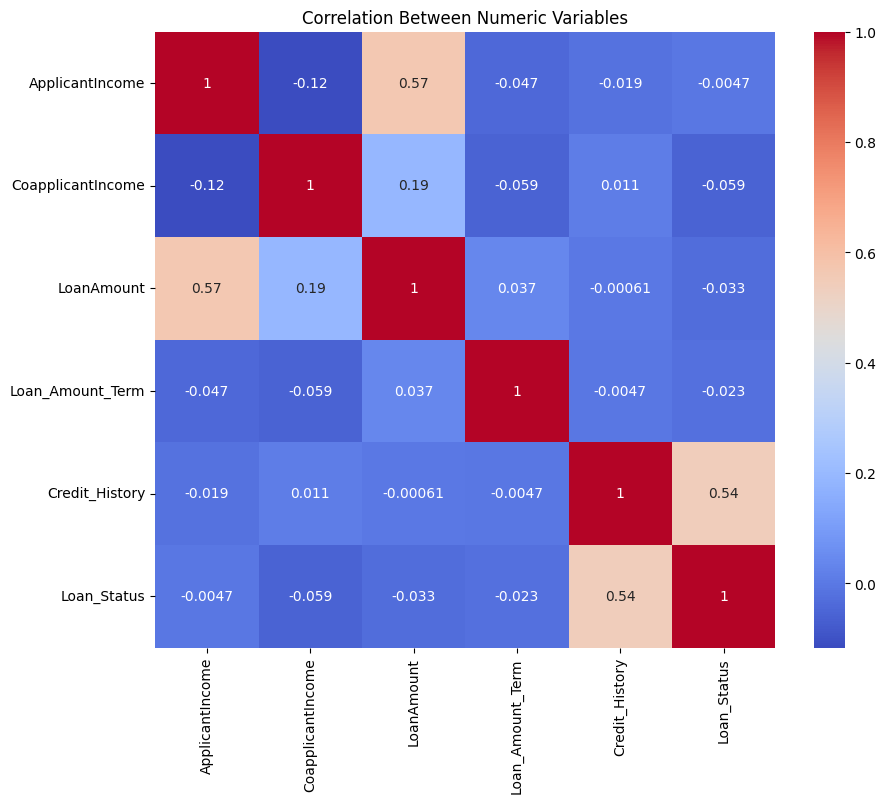

In [ ]:
plt.figure(figsize=(10, 8))
corr = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History','Loan_Status']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Variables")
plt.show()

Insights:
1. Applicants with a good credit history are most likely to get loan approval.
2. If Applicants income is high there are more chances of high loan amount eligibility.
3. Coapplicant's income has very less impact than the main applicant's income on the loan amount.

### Using cross_tabulation for catagorical columns

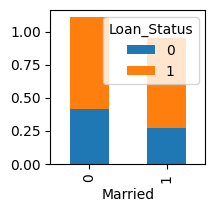

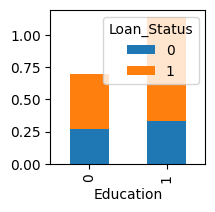

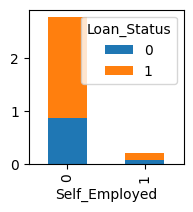

In [ ]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Married.div(Married.sum().astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2))
plt.show()
Education.div(Education.sum().astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2))
plt.show()
Self_Employed.div(Self_Employed.sum().astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(2,2))
plt.show()

Insights -

1. Unmarried are likely to take loans than married.
2. People below graduation are likely to take loans.
3. Self-employed are less likely to take loans.

6. Finding Outliers

In [ ]:
df.select_dtypes(include='number').columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'],
      dtype='object')

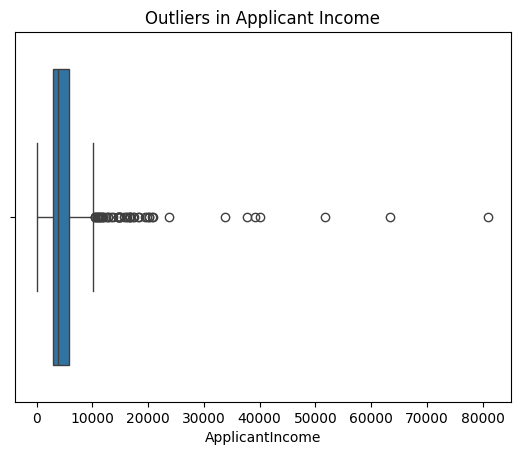

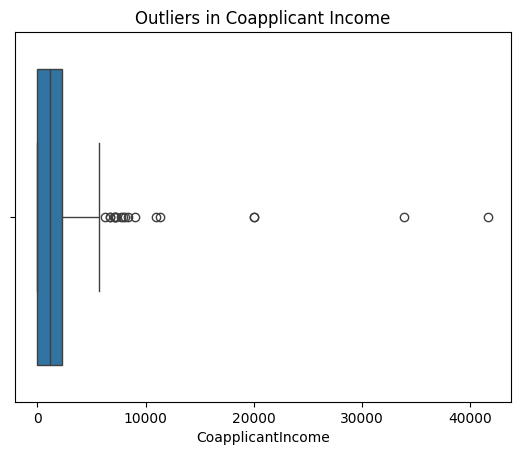

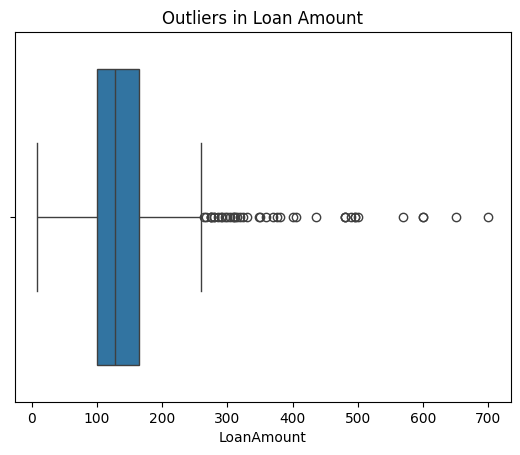

In [ ]:
# ApplicantIncome
sns.boxplot(x=df['ApplicantIncome'])
plt.title("Outliers in Applicant Income")
plt.show()

# CoapplicantIncome
sns.boxplot(x=df['CoapplicantIncome'])
plt.title("Outliers in Coapplicant Income")
plt.show()

# LoanAmount
sns.boxplot(x=df['LoanAmount'])
plt.title("Outliers in Loan Amount")
plt.show()

Removing Outliers for normalising the data

In [ ]:
Q1 = df['ApplicantIncome'].quantile(0.25)  # 25th percentile
Q3 = df['ApplicantIncome'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                         # Interquartile range (middle 50%)
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['ApplicantIncome'] >= lower) & (df['ApplicantIncome'] <= upper)]

Q1 = df['CoapplicantIncome'].quantile(0.25)  # 25th percentile
Q3 = df['CoapplicantIncome'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                         # Interquartile range (middle 50%)
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['CoapplicantIncome'] >= lower) & (df['CoapplicantIncome'] <= upper)]

Q1 = df['LoanAmount'].quantile(0.25)  # 25th percentile
Q3 = df['LoanAmount'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1                         # Interquartile range (middle 50%)
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['LoanAmount'] >= lower) & (df['LoanAmount'] <= upper)]

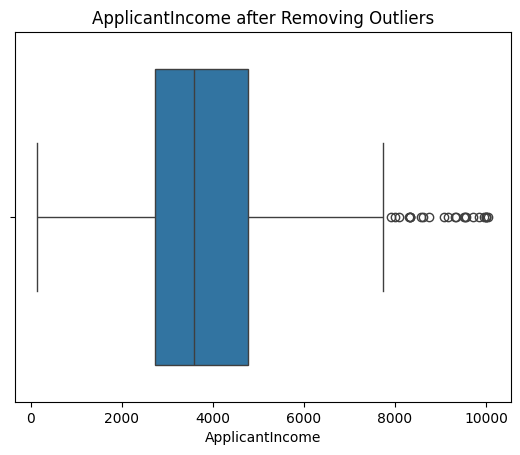

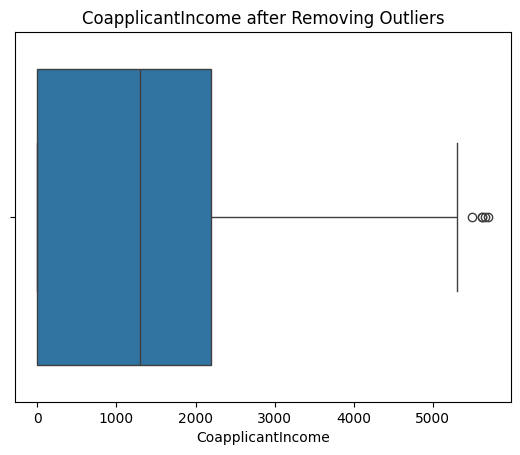

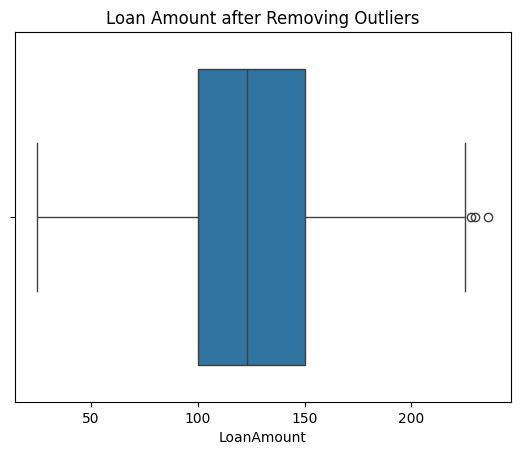

In [ ]:
sns.boxplot(x=df['ApplicantIncome'])
plt.title("ApplicantIncome after Removing Outliers")
plt.show()
sns.boxplot(x=df['CoapplicantIncome'])
plt.title("CoapplicantIncome after Removing Outliers")
plt.show()
sns.boxplot(x=df['LoanAmount'])
plt.title("Loan Amount after Removing Outliers")
plt.show()

** 8. Test train Split Data into X and Y

In [ ]:
from sklearn.model_selection import train_test_split

## Features(X) and Target(Y)
X = df.drop('Loan_Status',axis = 1)# Feature drops the target column
Y = df['Loan_Status']# Target variable

In [ ]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2


Split the data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print("training_set_shape:",X_train.shape)
print("test_set_shape:",X_test.shape)

training_set_shape: (416, 11)
test_set_shape: (104, 11)


In [158]:
print("training_set_shape:",Y_train.shape)
print("test_set_shape:",Y_test.shape)

training_set_shape: (416,)
test_set_shape: (104,)
